1. 이미지를 인식하는 원리

In [1]:
# MNIST 데이터는 텐서플로의 케라스 API를 이용해 불러올 수 있음.
from tensorflow.keras.datasets import mnist

# 불러온 이미지 데이터 : X, 이미지에 0~9를 붙인 이름표 : y
# 7만개 중 학습에 사용될 부분 : train (60000개), 테스트에 사용될 부분 : test (10000개)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'학습셋 이미지 수 : {X_train.shape[0]}개')
print(f'테스트셋 이미지 수 : {X_test.shape[0]}개')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


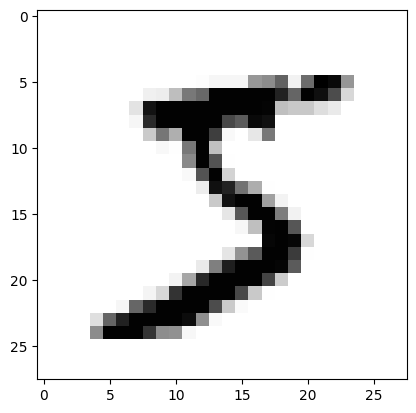

In [2]:
# 불러온 이미지 중 한 개만 불러오기
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys') # imshow() : 이미지 출력 / 첫 번째 이미지, 흑백으로
plt.show()

* 위의 이미지를 인식하는 원리
    * 가로 28 X 세로 28 = 784개의 픽셀로 이루어져있음.
    * 각 픽셀은 밝기 정도에 따라 **0부터 255까지** 등급을 매김

* 이미지는 숫자의 집합으로 바뀌어서 학습셋으로 사용된다.
* ==> 28 x 28 = 784개의 속성을 이용해 0-9의 클래스 중 하나를 맞추는 문제

In [4]:
import sys

for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' %i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [5]:
# 28 x 28 배열을 784개의 1차원 배열로 바꿔주어야 한다. --> reshape()
# reshape(총 샘플 수, 1차원 속성의 개수)
X_train = X_train.reshape(X_train.shape[0], 784)

* keras는 데이터를 0~1 값으로 변환 후 구동할 때 최적의 성능을 보인다.
* ==> 0-255 값으로 이루어진 값을 0-1 사이의 값으로 바꾸어야 한다
* ==> 각 값을 255로 나눈다. (정규화)

In [6]:
# astype() 함수를 이용해 실수형으로 바꾼 후 255로 나눈다.
X_train = X_train.astype('float64')
X_train = X_train / 255

In [7]:
# X_test에도 적용
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [8]:
# 숫자 이미지의 이름 확인
print(f'class : {y_train[0]}')

class : 5


* 딥러닝의 분류 문제를 해결하기 위해서는 **원-핫인코딩**방식을 적용해야 한다.
* 0~9의 정수형 값 --> 0 or 1로만 이루어진 벡터

In [12]:
# to_categorical()
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 데이터 구축
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트 셋과 학습 셋으로 나누기
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구축
# 784개의 속성, 10개의 클래스
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행하기 전 성과 저장하고, 최적화 단계에서는 학습을 자동 중단하게 한다.
# 모델 최적화를 위한 설정 구간
modelpath = './MNIST_MLP.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10번 이상 모델의 성능이 향상되지 않으면 자동으로 학습을 중단한다.

# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy : {:.4f}'.format(model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.20276, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.20276 to 0.13334, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13334 to 0.10930, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.10930 to 0.10764, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.10764 to 0.09217, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09217 to 0.08739, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss did not improve from 0.08739

Epoch 8: val_loss improved from 0.08739 to 0.08097, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.08097

Epoch 10: val_loss did not improve from 0.08097

Epoch 11: val_loss improved from 0.08097 to 0.07981, saving model to ./MNIST_MLP.keras

Epoch 12: val_loss improved from 0.07981 to 0.07831, saving model to ./MNIST_MLP.keras

Epoch 13: val_loss did not improve from 0.07831

Epoch 14: val_loss did n

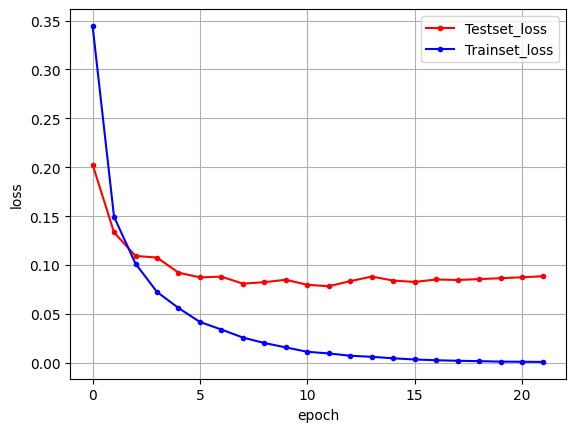

In [17]:
# 진행결과 그래프로 표현하기
# 학습셋의 오차를 그래프로 표현
import matplotlib.pyplot as plt
import numpy as np

y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드 주고 레이블 표시하기
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# CNN
* 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널(슬라이딩 윈도)을 도입하는 기법
    * 커널이 이미지를 한 칸씩 옮겨서 모두 적용해서 나온 층을 **컨볼루션 층**이라고 한다.
1. 컨볼루션 층
* 입력 데이터가 가진 특징을 대략적으로 추출해서 학습을 진행할 수 있음.
    * 커널을 여러 개 만들 경우, 여러 개의 컨볼루션 층이 만들어짐. (커널 하나 당, 컨볼루션 층 하나)
* Conv2D() : 컨볼루션층 추가

2. 맥스풀링, 드롭아웃, 플래튼
* 풀링
    * (1) 맥스풀링 : 정해진 구역 안에서 최댓값을 뽑아냄 ==> 가장 두드러진 특징을 추출함.
    * (2) 평균풀링 : 정해진 구역 안에서 평균값을 뽑아냄 ==> 전체적인 형태를 알 수 있음.
* 드롭아웃 : 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것
    * 학습 데이터에 지나치게 치우쳐져서 학습되는 과적합을 막아준다.
* 플래튼
    * 컨볼루션층, 맥스풀링은 주어진 이미지를 2차원 배열인 채로 다룬다. (특징 추출을 위해)
    * ==> 1차원으로 바꿔주어야 함.